In [1]:
#Note: This is a visualized version of neural networks with multiple layers lib.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from testCases_v4a import *
from sklearn.neural_network import MLPClassifier
#This is a implementation and library for binary classification, a.k.a logistic regression

In [3]:
#load iris dataset for debugging
from sklearn import datasets
dataset = datasets.load_breast_cancer()
#print(dataset)
inputx = dataset['data']
print('Size of dataset:',inputx.shape)
inputx = inputx.T
print('Size of dataset:',inputx.shape)
y = dataset['target']
y = y.reshape(1,-1)
print(y.shape)
#print(dataset['data'])    #input value of dataset
#print(dataset['target'])   #True label of iris datasets

Size of dataset: (569, 30)
Size of dataset: (30, 569)
(1, 569)


In [4]:
''' 
In order to implement neural networks, which turns out that we are using multiple computing units(e.g. sigmoid or relu), 
it is required to initialize the parameter w randomly, whileb can be set to all zeros.
'''

# nn_structure is a tuple, indicating the number of layers and units in each layer.
# for example, nn_structure = [4,4,3,1] indicates a neural network with 1 input layer, 2 hidden layers and one output unit.
def nn_parameter_initialize(nn_structure):
    # x_dim indicates the dimensions of input feature,a bias unit b is defaultly set.
    parameter = {}
    for i in range(1,len(nn_structure)):
        parameter['w'+str(i)] = np.random.randn(nn_structure[i],nn_structure[i-1])*0.01 
        parameter['b'+str(i)] = np.zeros((nn_structure[i],1))
    return parameter

# Let's check whether the function is working properly or not
test = nn_parameter_initialize([4,3,2,1])
print(test)

{'w1': array([[ 0.00041518,  0.00293641,  0.00550619,  0.00758608],
       [ 0.00379733,  0.0131645 ,  0.01687826,  0.00322454],
       [-0.00540673, -0.00146829, -0.01986683,  0.01138936]]), 'b1': array([[0.],
       [0.],
       [0.]]), 'w2': array([[-0.01439044,  0.00686302,  0.00485144],
       [-0.0059624 ,  0.02058947, -0.00433671]]), 'b2': array([[0.],
       [0.]]), 'w3': array([[-0.01410323,  0.01403226]]), 'b3': array([[0.]])}


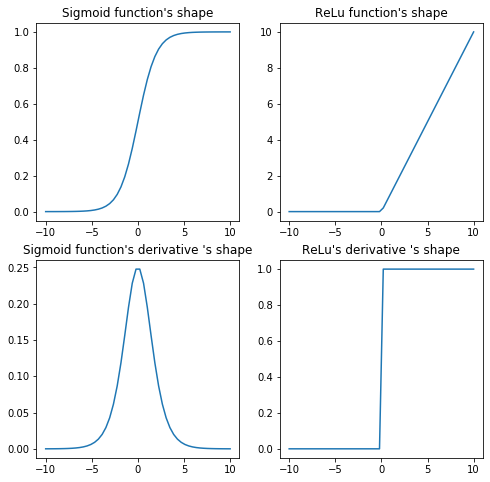

In [5]:
#implementation of sigmoid function
def sigmoid(z):
    value = 1/(1+np.exp(-z))
    return value

def relu(z):
    value = np.maximum(0,z)
    return value

def derivative_of_activation(a,activation='sigmoid'):
    derivative = 0
    shape = a.shape
    if(activation == 'sigmoid'):
        derivative = sigmoid(a)*(1-sigmoid(a))
    elif(activation == 'relu'):
        derivative = a>0
        derivative = derivative.astype(np.int32)
    return derivative.reshape(shape)

#plot functions' shape
plt.figure(figsize=(8,8))

plt.subplot(221)
plt.title('Sigmoid function\'s shape')
z = np.linspace(-10,10)
plt.plot(z,sigmoid(z))

plt.subplot(222)
plt.title('ReLu function\'s shape')
z = np.linspace(-10,10)
plt.plot(z,relu(z))

plt.subplot(223)
plt.title('Sigmoid function\'s derivative \'s shape')
z = np.linspace(-10,10)
plt.plot(z,derivative_of_activation(z))

plt.subplot(224)
plt.title('ReLu\'s derivative \'s shape')
z = np.linspace(-10,10)
plt.plot(z,derivative_of_activation(z,activation='relu'))

In [6]:
# note the dimensions of vectors:
# w - (number_of_units_in_current_layer,number_of_units_in_previous_layer)
# b - (number_of_units_in_current_layer,1) *broadcasted*
# X - (x_dims,m)                           *m=number of samples

'''
Note that in neural networks with multiple layers, when doing forward prop, we need to cache some values for back prop step.
For example:
    when doing forward prop, we calculate z = np.dot(w,X)+b ,and then output a = g(z), when function g can be relu or sigmoid.
    when doing back prop, we calculate dz = da*g'(z), where g'(z) is the derivative of g(z)
    Therefore we can just cache z to save some time for calculating z multiple times.
    
In a nutshell, what we can cache in forward prop are: z,a,w
'''

# Forward propagation step: compute the predicted y's label
def linear_forward_prop(w,b,X):
    z = np.dot(w,X) + b
    linear_cache = w
    #print('Linear_forward_z=',z)
    return z,linear_cache

def single_layer_forward_prop(z,activation='relu'):
    if(activation == 'relu'):
        a = relu(z)
    elif(activation == 'sigmoid'):
        a = sigmoid(z)
    activation_cache = a,z
    return a,activation_cache

def L_layer_forward_prop(X,parameters):
    A = {0:X}
    cache = {}  
    L = len(parameters) // 2
    for i in range(L-1):
        w = parameters['w'+str(i+1)]
        b = parameters['b'+str(i+1)]
        z,linear_cache = linear_forward_prop(w,b,A[i])
        a,activation_cache = single_layer_forward_prop(z,activation='relu')
        A[i+1] = a
        cache['layer_'+str(i+1)] = linear_cache,activation_cache
    w = parameters['w'+str(L)]
    b = parameters['b'+str(L)]    
    z,linear_cache = linear_forward_prop(w,b,A[L-1])
    yhat,activation_cache = single_layer_forward_prop(z,activation='sigmoid')
    cache['layer_'+str(L)] = linear_cache,activation_cache
    return yhat,cache

In [7]:
'''
This part is used for testing robustness and debugging
You can skip this part.
the original testCases_v4a.py is programmed by professor Ng in his deeplearning courses.
'''

print('Single layer forward propagation test:')
A_prev, W, b = linear_activation_forward_test_case()
z,linear_cache = linear_forward_prop(W,b,A_prev)
a,activation_cache = single_layer_forward_prop(z,activation='relu')
print("With relu: A = " + str(a))
a,activation_cache = single_layer_forward_prop(z,activation='sigmoid')
print("With sigmoid: A = " + str(a))
parameters = {}
X, parameter = L_model_forward_test_case_2hidden()
parameters['w1'] = parameter['W1']
parameters['w2'] = parameter['W2']
parameters['w3'] = parameter['W3']
parameters['b3'] = parameter['b3']
parameters['b2'] = parameter['b2']
parameters['b1'] = parameter['b1']
yhat,cache_from_forward = L_layer_forward_prop(X,parameters)
print(yhat)
L = len(cache_from_forward)
W = {}
A = {}
Z = {}
for layer in range(1,L+1):
    linear_cache_l,activation_cache_l = cache_from_forward['layer_'+str(layer)]
    W[layer] = linear_cache_l
    A[layer],Z[layer] = activation_cache_l
print(A[L])

Single layer forward propagation test:
With relu: A = [[3.43896131 0.        ]]
With sigmoid: A = [[0.96890023 0.11013289]]
[[0.03921668 0.70498921 0.19734387 0.04728177]]
[[0.03921668 0.70498921 0.19734387 0.04728177]]


In [8]:
# Compute cost function: used to check convergence
def compute_cost(yhat,y):
    m = yhat.shape[1]
    cost = -np.sum(y*np.log(yhat)+(1-y)*np.log(1-yhat))/m
    return cost

In [9]:
Y, AL = compute_cost_test_case()

print("cost = " + str(compute_cost(AL, Y)))

cost = 0.2797765635793423


In [10]:
# Back propagation step: compute partial derivatives of each parameter respectively
def linear_back_prop(w,a_previous,dz_l):
    m = a_previous.shape[1]
    dw_l = np.dot(dz_l,a_previous.T)/m
    assert(dw_l.shape == w.shape)
    
    db = np.sum(dz_l,axis=1,keepdims=True)/m
    da_previous = np.dot(w.T,dz_l)
    assert(da_previous.shape == a_previous.shape)
    return dw_l,db,da_previous
 # Note: dw should have the same dimension as w have.Therefore back_prop returns dw.T
    
def single_layer_back_prop(da_l,z_l,activation):
    derivative = derivative_of_activation(z_l,activation)
    dz_l = da_l * derivative
    assert(dz_l.shape == z_l.shape)
    return dz_l

def L_layer_back_prop(X,y,cache_from_forward,testAL = np.zeros(1)):
    dW = {}
    db = {}
    dA = {}
    W = {}
    A = {0:X}
    Z = {}
    m = y.shape[1]
    L=len(cache_from_forward)
    for layer in range(1,L+1):
        linear_cache_l,activation_cache_l = cache_from_forward['layer_'+str(layer)]
        W[layer] = linear_cache_l
        A[layer],Z[layer] = activation_cache_l
    #print('AL = ',A[L])
    #Initialize the output layer
    if((testAL == np.zeros(1))):
        yhat = A[L]
    else:
        yhat = testAL
    dA[L] = -np.divide(y,yhat)+np.divide((1-y),(1-yhat))
    dz_L = single_layer_back_prop(dA[L],Z[L],activation='sigmoid')
    dW[L],db[L],dA[L-1] = linear_back_prop(W[L],A[L-1],dz_L)
    
    for i in reversed(range(1,L)):
        dz_l = single_layer_back_prop(dA[i],Z[i],activation='relu')
        dW[i],db[i],dA[i-1] = linear_back_prop(W[i],A[i-1],dz_l)
        assert(dW[i].shape == W[i].shape)
    return dW,db

In [11]:
'''
This part is used for testing robustness and debugging
You can skip this part.
the original testCases_v4a.py is programmed by professor Ng in his deeplearning courses.
'''

# Set up some test inputs
dZ, linear_cache = linear_backward_test_case()
a_previous, w, b = linear_cache
dW, db,dA_prev = linear_back_prop(w,a_previous,dZ) 
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

print('\nSingle layer forward prop test:')
da_l, linear_activation_cache = linear_activation_backward_test_case()
linear_cache, activation_cache = linear_activation_cache
a_previous, w, b = linear_cache
z_l = activation_cache
print()
dz_l = single_layer_back_prop(da_l,z_l,activation='sigmoid')
dW, db,dA_prev = linear_back_prop(w,a_previous,dz_l) 
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")
dz_l = single_layer_back_prop(da_l,z_l,activation='relu')
dW, db,dA_prev = linear_back_prop(w,a_previous,dz_l) 
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

cache_from_forward = {}
print('Multiple layers back prop test:')
AL, Y_assess, caches = L_model_backward_test_case()
print('L = ',len(caches))
cache_2 = caches[1]
cache_1 = caches[0]

linear_cache, activation_cache = cache_2
print(activation_cache.shape)
a_previous, w, b = linear_cache
print('w2.shape',w.shape)
z_l = activation_cache
linear_cache = w
activation_cache = AL,z_l #a_previous,z_l
cache_from_forward['layer_'+str(2)] = linear_cache,activation_cache
linear_cache, activation_cache = cache_1
X, w, b = linear_cache
print('w1.shape',w.shape)
z_l = activation_cache
linear_cache = w
activation_cache = a_previous,z_l
cache_from_forward['layer_'+str(1)] = linear_cache,activation_cache
print('X:',a_previous.shape)
#dW,db = L_layer_back_prop(X,Y_assess,cache_from_forward,testAL = AL)
print('dW = ',dW)
print('db = ',db)
cache_from_forward = {}

dA_prev = [[-1.15171336  0.06718465 -0.3204696   2.09812712]
 [ 0.60345879 -3.72508701  5.81700741 -3.84326836]
 [-0.4319552  -1.30987417  1.72354705  0.05070578]
 [-0.38981415  0.60811244 -1.25938424  1.47191593]
 [-2.52214926  2.67882552 -0.67947465  1.48119548]]
dW = [[ 0.07313866 -0.0976715  -0.87585828  0.73763362  0.00785716]
 [ 0.85508818  0.37530413 -0.59912655  0.71278189 -0.58931808]
 [ 0.97913304 -0.24376494 -0.08839671  0.55151192 -0.10290907]]
db = [[-0.14713786]
 [-0.11313155]
 [-0.13209101]]

Single layer forward prop test:

sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]

Multiple layers back prop test:
L =  2
(1, 2)
w2.shape (1, 3)
w1.shape (3, 4)
X: (3, 2)
dW =  [[ 0.44513824  0.37371418 -

In [12]:
def update_parameters(params,learning_rate,dW,dB):
        L = len(params) // 2
        for j in range(1,L+1):
            params['w'+str(j)] = params['w'+str(j)] - learning_rate*dW[j]
            params['b'+str(j)] = params['b'+str(j)] - learning_rate*dB[j]
        return params

In [13]:
'''
This part is used for testing robustness and debugging
You can skip this part.
the original testCases_v4a.py is programmed by professor Ng in his deeplearning courses.
'''

dW = {}
dB = {}
params = {}
parameters, grads = update_parameters_test_case()
params['w1'] = parameters['W1']
params['w2'] = parameters['W2']
params['b1'] = parameters['b1']
params['b2'] = parameters['b2']
dW[1] = grads['dW1']
dW[2] = grads['dW2']
dB[1] = grads['db1']
dB[2] = grads['db2']
print(params)
params = update_parameters(params,0.1,dW,dB)
print(params)

{'w1': array([[-0.41675785, -0.05626683, -2.1361961 ,  1.64027081],
       [-1.79343559, -0.84174737,  0.50288142, -1.24528809],
       [-1.05795222, -0.90900761,  0.55145404,  2.29220801]]), 'w2': array([[-0.5961597 , -0.0191305 ,  1.17500122]]), 'b1': array([[ 0.04153939],
       [-1.11792545],
       [ 0.53905832]]), 'b2': array([[-0.74787095]])}
{'w1': array([[-0.59562069, -0.09991781, -2.14584584,  1.82662008],
       [-1.76569676, -0.80627147,  0.51115557, -1.18258802],
       [-1.0535704 , -0.86128581,  0.68284052,  2.20374577]]), 'w2': array([[-0.55569196,  0.0354055 ,  1.32964895]]), 'b1': array([[-0.04659241],
       [-1.28888275],
       [ 0.53405496]]), 'b2': array([[-0.84610769]])}


In [14]:
# The overall implementation of training a logistic regression
# Note: net_structure indicates the shape of hidden layers and output layers. No input layer should be included.

def train_neural_network(X,y,net_structure,number_of_iteration = 1000,learning_rate = 0.03,print_cost = True,plot_cost = True):
    # Dimension convert: make sure all vectors are in proper shapes.
    y = y.reshape(1,-1)# y is a row vector
    
    m = y.shape[1]  #  m = total number of trainning examples
    if(X.shape[1] != m):
        X=X.T       #=====> Note that array.reshape and array.T are different!
    assert(X.shape[1] == m)
    print('*******Dimension Check*******')
    print('Input feature\'s dimension: ',X.shape)
    print('Output\'s dimension: ',y.shape)
    print('*****************************')
    x_dim = X.shape[0]
    L = len(net_structure) # number of layers
    # Initialize parameters
    nn_structure = [x_dim]+net_structure
    params = nn_parameter_initialize(nn_structure)
    print('Training {} layers neural network...'.format(len(params)//2))
    if(plot_cost == True):
        i_curve = []
        cost_curve = []
        plt.figure(figsize=(5,5))
        plt.title('Cross entropy')
    
    cache={}
    for i in range(1,number_of_iteration+1):
            # Steps:
                # 1:Forward propagation
                # 2:Compute cost
                # 3:Backward Propagation
                # 4:Update parameters
                
        yhat,cache = L_layer_forward_prop(X,params)
        assert(yhat.shape == y.shape)
        cost = compute_cost(yhat,y)
        #print('yhat=',yhat)
        dW,dB = L_layer_back_prop(X,y,cache)
        #if(i%10 == 0):
            #print('Iteration {},dW[2] = {}'.format(i,dW[2]))
            
        #Gradient decent
        params = update_parameters(params,learning_rate,dW,dB)
            
        # Visualize the process of regression
        if(i%100 == 0 and print_cost == True):
            print('number of iterations:{}, cost = {}'.format(i,cost))
        if(i%100 == 0 and plot_cost == True):
            i_curve.append(i)
            cost_curve.append(cost)
            
    if(plot_cost==True):        
        i_curve = np.reshape(i_curve,(1,-1))
        cost_curve = np.reshape(cost_curve,(1,-1))
        plt.scatter(i_curve,cost_curve)
    return params

In [15]:
#After training the unit, we can now use it to make predictions.
def nn_predict(parameters,X,y=0,evaluate = True):
    L = len(parameters) // 2
    w1 = parameters['w1'] 
    num_of_features = w1.shape[1]
#    m = y.shape[1]  #  m = total number of trainning examples
    if(X.shape[0] != num_of_features):
        X=X.T       #=====> Note that array.reshape and array.T are different!
    yhat,cache = L_layer_forward_prop(X,parameters)
    yhat = yhat>0.5
    #Codes below is used to evaluate the performance of logistic regression on given dataset X with label y
    #You can just ignore this part
    if(evaluate == True):
        y=y.reshape(1,-1)
        train_accuracy = np.sum(yhat==y)/y.shape[1]
        print('accuracy = %.2f\n'%train_accuracy)
    return yhat

In [16]:
print("Goal:Wanna classify whether our patient's breast cancer is {}(0) or {}(1)".format(dataset.target_names[0],dataset.target_names[1]))
y = dataset['target']
#Normalize input feature X
X = dataset['data']
X_norm = np.linalg.norm(X,axis=1,keepdims=True)
X = (10*X)/ (np.max(X)-np.min(X))
#Split up dataset in order to train as well as test the model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

Goal:Wanna classify whether our patient's breast cancer is malignant(0) or benign(1)


Maximum of dataset:  10.0
Minimum of dataset:  0.0
Mean of dataset:  0.14753799182080282
*******Dimension Check*******
Input feature's dimension:  (30, 398)
Output's dimension:  (1, 398)
*****************************
Training 3 layers neural network...


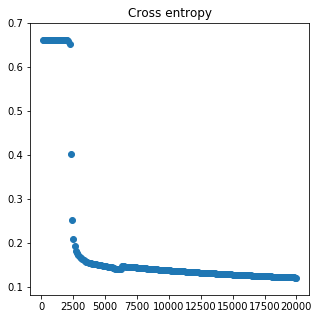

In [17]:
# Train the logistic unit
print('Maximum of dataset: ',np.max(X_train))
print('Minimum of dataset: ',np.min(X_train))
print('Mean of dataset: ',np.mean(X_train))
parameters = train_neural_network(X_train,y_train,[3,10,1],number_of_iteration = 20000,learning_rate = 0.1,print_cost = False,plot_cost = True)

In [18]:
# Evaluate the performance of the unit on training set and test set
print('Training accuracy:')
Yhat = nn_predict(parameters,X_train,y_train,evaluate = True)
print('Accuracy in test sets:')
Ypredict = nn_predict(parameters,X_test,y_test,evaluate = True)
mlp = MLPClassifier(solver='lbfgs', alpha=0.03,hidden_layer_sizes=(3,8), random_state=1)
mlp = mlp.fit(X_train,y_train)
train_score=mlp.score(X_train,y_train)#How many samples can the model predict right? 
print('sklearn\'s neural network training accuracy:')
print('%.2f'%train_score)
#Okay, we have built our own neural network. Let's compare our unit with sklearn's! 
test_score=mlp.score(X_test,y_test)
print('sklearn\'s neural network training accuracy:')
print('%.2f'%test_score)
print('Loss = ',mlp.loss_)

Training accuracy:
accuracy = 0.94

Accuracy in test sets:
accuracy = 0.94

sklearn's neural network training accuracy:
0.95
sklearn's neural network training accuracy:
0.94
Loss =  0.1319169849122829
